# Import Necessary Libraries

In [1]:
# Data Manipulation and Linear Algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

## Getting the Data 

In [2]:
df = pd.read_csv("./datasets/churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Dropping some Columns of Less Importance

In [3]:
drop_cols = ["RowNumber", "CustomerId", "Surname"]
df.drop(columns=drop_cols, inplace=True)

In [4]:
df.info() # Luckiley we dont have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

## Plotting Correlation Heatmap Before Encoding Categorical Variables

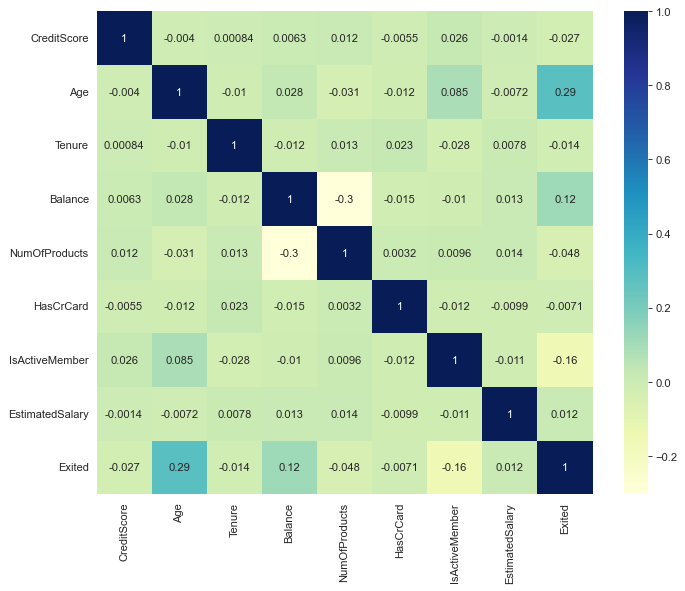

In [6]:
plt.figure(dpi=80, figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu") # Not many correlations between features
plt.show()

## Distribution Plots

<AxesSubplot:xlabel='Balance', ylabel='Count'>

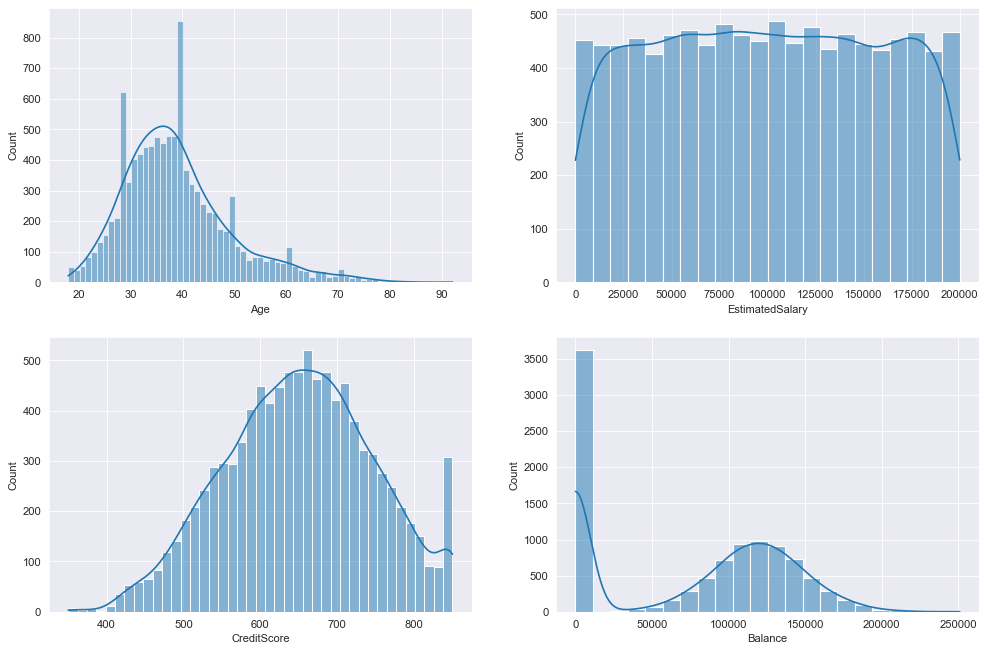

In [7]:
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(221)
sns.histplot(df["Age"], kde=True) # Age is Right Skewed and most of the people are around 30 - 40 years old

plt.subplot(222)
sns.histplot(df["EstimatedSalary"], kde=True) # Salary is Well Distributed

plt.subplot(223)
sns.histplot(df["CreditScore"], kde=True) # Credit Score is Left Skewed and most people have 600 - 700 Credit Score

plt.subplot(224)
sns.histplot(df["Balance"], kde=True) # Balance Data is also well distributed if 0 is ignored

## Age vs IsActiveMember, Exited

Text(0.5, 1.0, 'Exited vs Age')

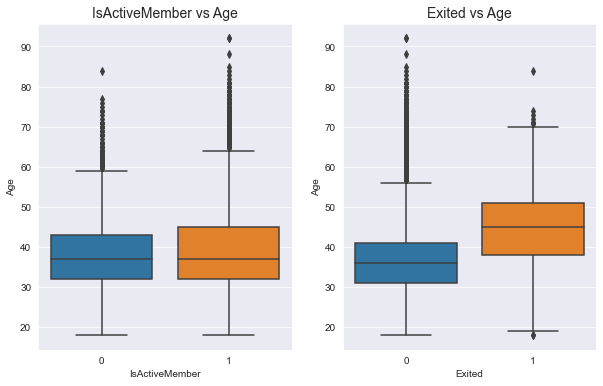

In [8]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
sns.boxplot(x="IsActiveMember", y="Age", data=df)
plt.title("IsActiveMember vs Age", fontdict={"fontsize": 14, "fontweight":500})

plt.subplot(122)
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Exited vs Age", fontdict={"fontsize": 14, "fontweight":500})

# People of Higher age i.e., 40 years and above tend to leave the bank more

## Balance vs Exited

Text(0.5, 1.0, 'Exited vs Balance')

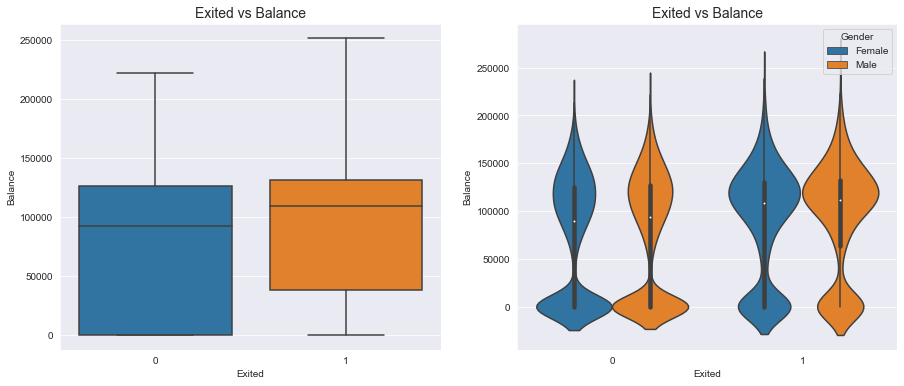

In [9]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Exited vs Balance", fontdict={"fontsize": 14, "fontweight":500})
# If we observe Median value people with Higher balance tend to leave bank

plt.subplot(122)
sns.violinplot(x="Exited", y="Balance", hue="Gender", data=df)
plt.title("Exited vs Balance", fontdict={"fontsize": 14, "fontweight":500})

## NumOfProducts vs Balance

Text(0.5, 1.0, 'NumOfProducts vs Balance')

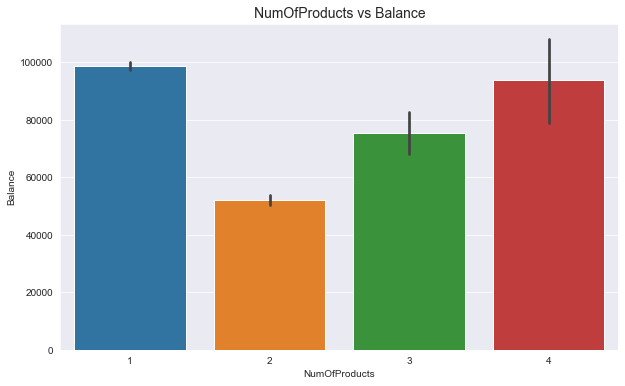

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x="NumOfProducts", y="Balance", data=df)
plt.title("NumOfProducts vs Balance", fontdict={"fontsize": 14, "fontweight":500})
# Most of the people have 1 or 4 products

## Pair Plot

In [11]:
# sns.pairplot(df, hue="Gender")
# plt.show()

# Preparing Data

## OneHotEncoding Data

In [12]:
df = pd.get_dummies(df)
df.reset_index(drop=True, inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


## Stratified Train Test Split
### Evenly Spreading the Dependent Variable "status" in Train and Test set

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Exited']):
    train = df.loc[train_index]
    test = df.loc[test_index]

In [14]:
X_train = train.drop("Exited", axis=1)
y_train = train["Exited"]

X_test = test.drop("Exited", axis=1)
y_test = test["Exited"]

## Feature Scaling

In [15]:
cols_to_scale = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

sc = StandardScaler()

X_train[cols_to_scale] = sc.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = sc.transform(X_test[cols_to_scale])

# Machine Learning - Multiple Model Testing

In [16]:
# Dataframe to store all the accuracy scores for Comparison and Analysis
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

        print(MLA_name, "Done")
        row_index+=1

In [17]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),

    XGBClassifier(eval_metric="logloss", use_label_encoder=False),
    CatBoostClassifier(silent=True)  
    ]

MLA_testing(MLA=MLA, X_train=X_train, X_test=X_test)

AdaBoostClassifier Done
BaggingClassifier Done
ExtraTreesClassifier Done
GradientBoostingClassifier Done
RandomForestClassifier Done
LogisticRegressionCV Done
RidgeClassifierCV Done
SGDClassifier Done
BernoulliNB Done
GaussianNB Done
KNeighborsClassifier Done
SVC Done
LinearSVC Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done
LinearDiscriminantAnalysis Done
XGBClassifier Done
CatBoostClassifier Done


# Comparing Models

## Top 10 Best Performing Models

In [18]:
MLA_compare = MLA_compare.sort_values(by="K-Fold Accuracy", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,CatBoostClassifier,87.20,86.3375
1,GradientBoostingClassifier,86.90,86.3000
2,RandomForestClassifier,85.85,86.2500
3,AdaBoostClassifier,85.60,85.4250
4,ExtraTreesClassifier,85.55,85.4250
5,XGBClassifier,85.25,85.4000
6,BaggingClassifier,85.10,84.9250
7,SVC,82.05,81.9875
8,KNeighborsClassifier,82.60,81.7625
9,GaussianNB,80.60,81.2500


# Trying Some Best Performing Models

In [19]:
def MLA_testing(MLA, X_train, X_test, y_train, y_test):      
    # Training The Model
    MLA.fit(X_train, y_train)

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = MLA, X = X_train, y = y_train, cv = 10, n_jobs=-1)
    print("K-Fold Accuracies:\n", kfold_accuracy, "\n")
    
    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = MLA, X = X_test, y = y_test, cv = 10, n_jobs=-1)
    
    # Accuracy for y_test and y_pred
    classifier_accuracy_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")
    
    # Confusion Matrix
    conf_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mtx, "\n")
    
    # Classification Report
    class_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_rep, "\n")
    
    try:
        # Precision - Recall Curve
        yhat = MLA.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
        
        plt.figure(dpi=100, figsize=(15, 6))
        plt.subplot(121)
        sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
        sns.lineplot(recall, precision, marker='.', label=MLA.__class__.__name__)
        plt.title("Recall vs Precision Curve")
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        
        # ROC Curve
        plt.subplot(122)
        sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
        fpr, tpr, _ = roc_curve(y_test, yhat[:, 1])
        sns.lineplot(fpr, tpr, marker='.', label=MLA.__class__.__name__)
        plt.title("ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        
        plt.show()
    except:
        pass
    
    # Important Features for The Algorithms
    imp_cols = pd.DataFrame()
    imp_cols["Features"] = X_train.columns
    imp_cols["Importance"] = MLA.feature_importances_
    imp_cols = imp_cols.sort_values(by="Importance", ascending=False)
    
    plt.figure(dpi=80, figsize=(10, 8))
    sns.barplot(y="Features", x="Importance", data=imp_cols)
    plt.title("Importance of Features")
    plt.show()

## Catboot Classifier

K-Fold Accuracies:
 [0.85625 0.85375 0.8625  0.8825  0.84375 0.86375 0.87    0.85875 0.8675
 0.875  ] 

Accuracy Score:
 0.865 

Confusion Matrix:
 [[1536   57]
 [ 213  194]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000
 



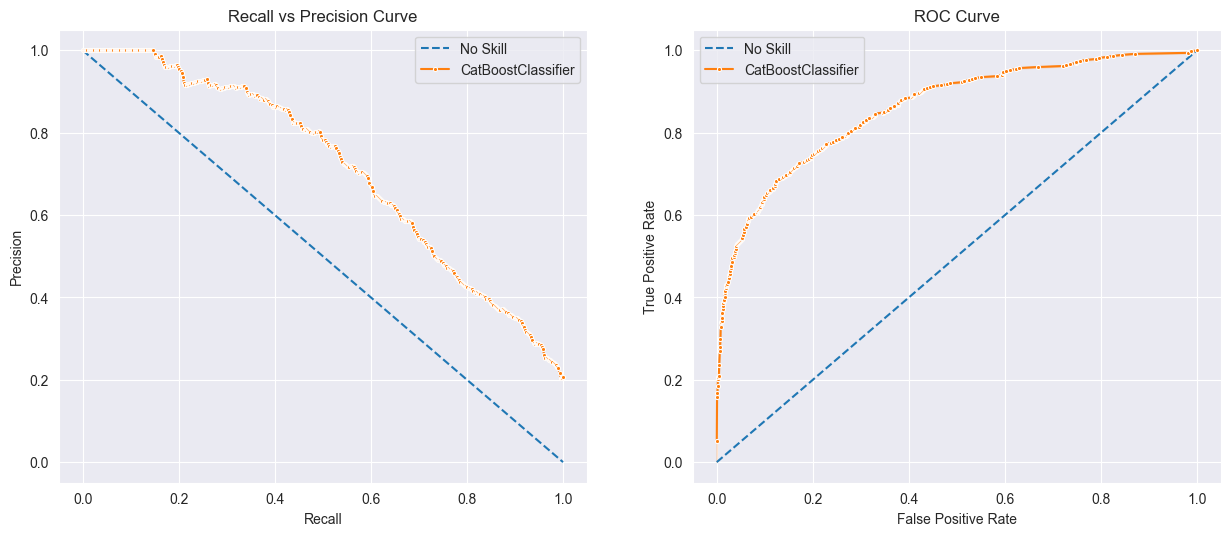

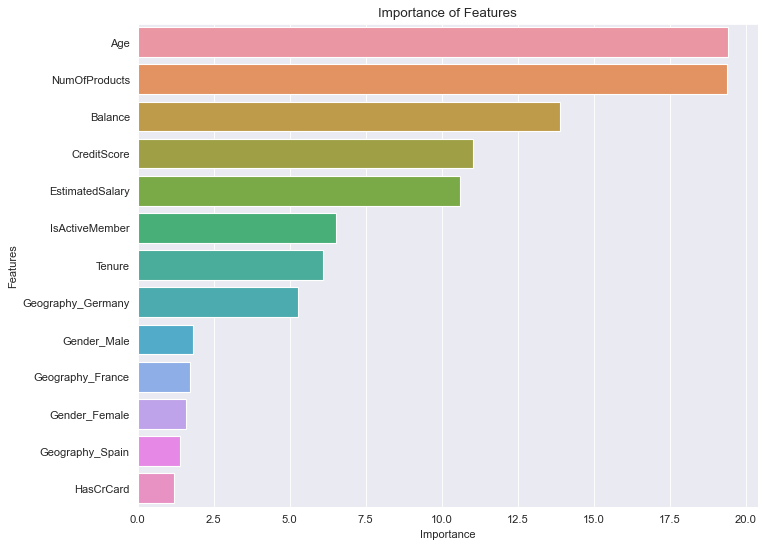

In [20]:
cat_clf = CatBoostClassifier(silent=True)  

MLA_testing(cat_clf, X_train, X_test, y_train, y_test)

## GradientBoostingClassifier

K-Fold Accuracies:
 [0.85875 0.855   0.86    0.88    0.84625 0.86    0.86875 0.855   0.875
 0.87125] 

Accuracy Score:
 0.863 

Confusion Matrix:
 [[1532   61]
 [ 213  194]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000
 



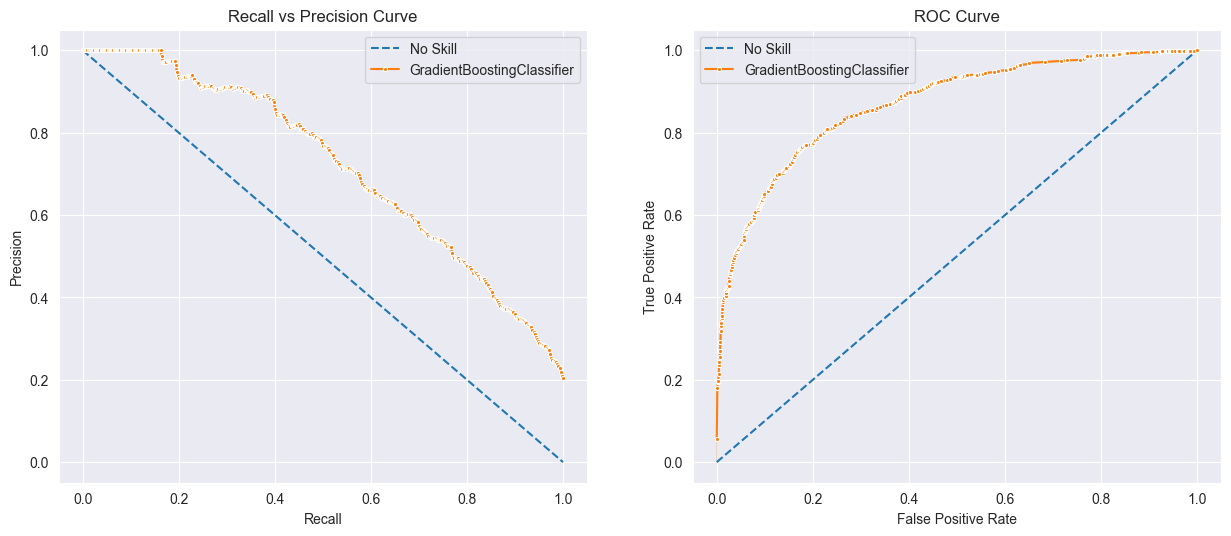

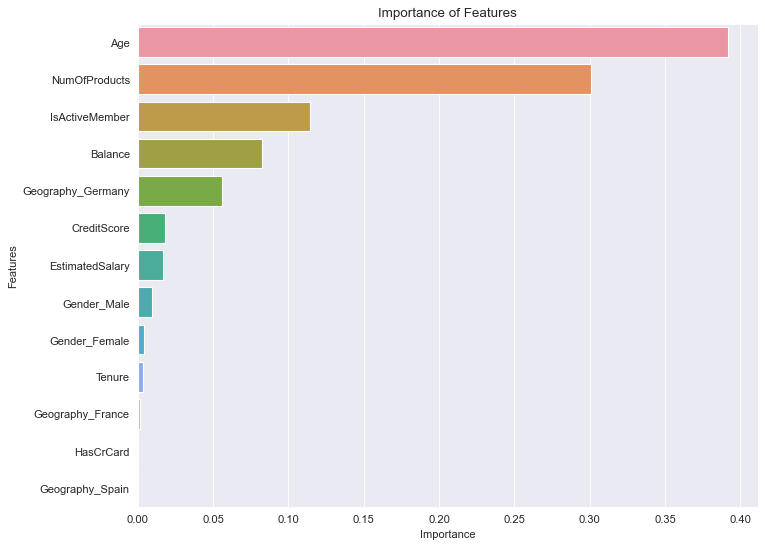

In [21]:
gb_clf = ensemble.GradientBoostingClassifier()

MLA_testing(gb_clf, X_train, X_test, y_train, y_test)

## RandomForestClassifier

K-Fold Accuracies:
 [0.86    0.85125 0.85875 0.87375 0.8325  0.86125 0.875   0.85625 0.8775
 0.8725 ] 

Accuracy Score:
 0.863 

Confusion Matrix:
 [[1550   43]
 [ 231  176]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000
 



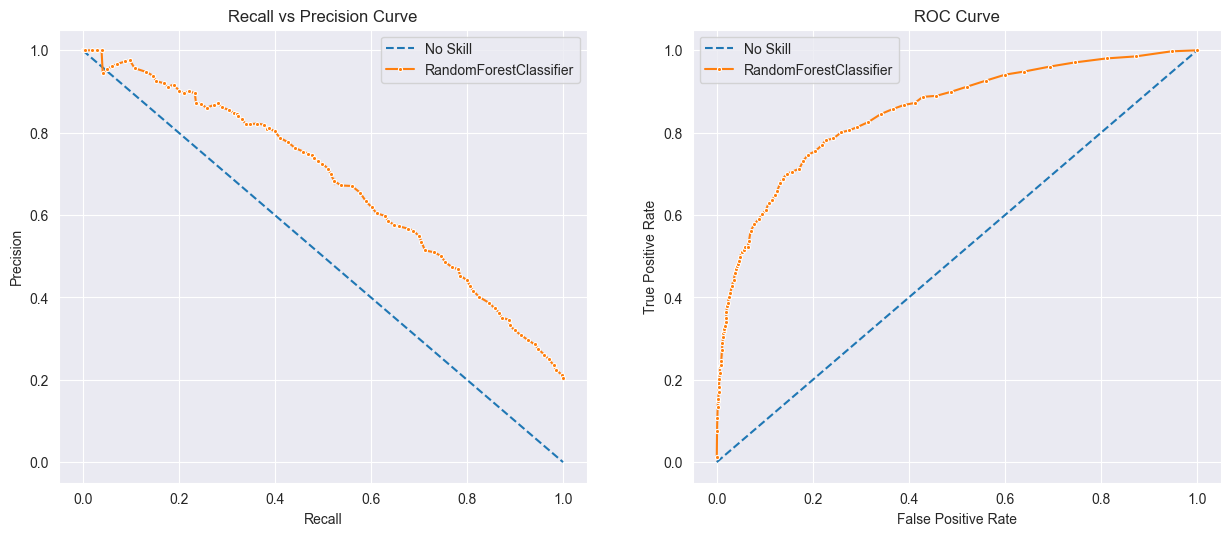

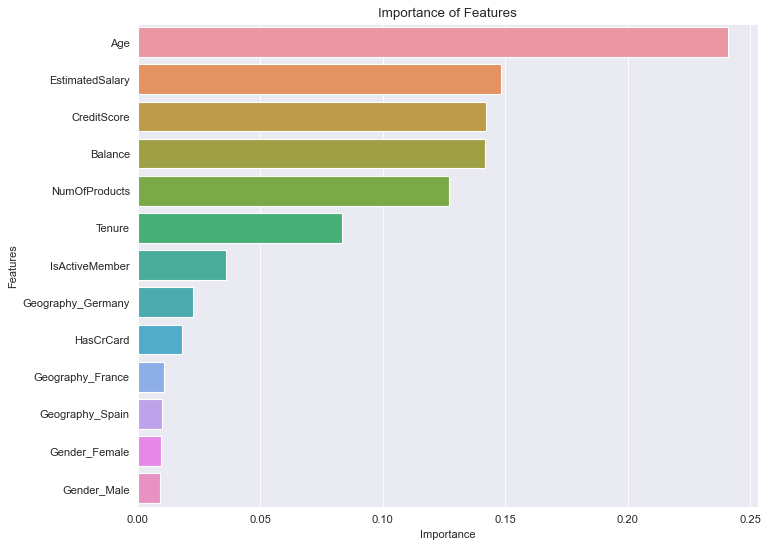

In [22]:
rf_clf = ensemble.RandomForestClassifier()

MLA_testing(rf_clf, X_train, X_test, y_train, y_test)